<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parameters-of-the-simulation" data-toc-modified-id="Parameters-of-the-simulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parameters of the simulation</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def funH(p,r):
    '''
    devuelve H y DI, que son la entropía y dimensión de entropía
    
    los valores de r han de estar en el simplex
    el programa realiza una normalización previa
    '''
    pV = np.array(p)
    rV = np.array(r)
    
    # normalizacion de R
    rVprima = rV/np.sum(rV)
    log2rVprima = np.log2(rVprima)
    
    log2pV = np.log2(pV)
    #log2rV = np.log2(rV)
    H = np.sum(np.multiply(pV,log2pV))
    H = -H
    den = np.sum(np.multiply(pV,log2rVprima))
    den = -den
    DI = H/den
    
    #entropía balanceada
    biasedEnt = []
    for i in range(3):
        pPos = pV[i]
        #pPos = pV[pos]
        log2pPos = np.log2(pPos)
        num = pPos*log2pPos
        biasedEnt.append(num/den)
    
    return H,DI,biasedEnt

In [3]:
def IterationsTriangle(p,r,puntoInicial=1,iteraciones=50):
    
    # vertices del triángulo
    v1 = np.array([[0],[0]])
    v2 = np.array([[1],[0]])
    v3 = np.array([[1/2],[np.sqrt(3)/2]])
    
    r1,r2,r3 = r
    
    def matrizContractiva(razon):
        return np.array([[razon,0],[0,razon]])
    
    def alea(low=0.0,high=1.0):
        return np.random.uniform(low,high)
    
    B1 = (np.eye(2)-matrizContractiva(r1)).dot(v1)
    B2 = (np.eye(2)-matrizContractiva(r2)).dot(v2)
    B3 = (np.eye(2)-matrizContractiva(r3)).dot(v3)
    
    # afinidades
    afinD = dict()

    afinD[0]=[matrizContractiva(r1),B1]
    afinD[1]=[matrizContractiva(r2),B2]
    afinD[2]=[matrizContractiva(r3),B3]
    
    # punto inicial
    if puntoInicial == 1:
        pI = v1
    elif puntoInicial == 2:
        pI = v2
    else:
        pI = v3
        
    # iteracion
    listaX = []
    listaY = []

    listaX.append(pI[0][0])
    listaY.append(pI[1][0])
            
    for _ in range(iteraciones):
        ultX = listaX[-1]
        ultY = listaY[-1]

        ultimo = np.array([[ultX],[ultY]])
        al = alea()

        if al <= p1:
            caso = 0
        elif al <= p1+p2:
            caso = 1
        else:
            caso = 2
        nuevo = afinD[caso][0].dot(ultimo)+afinD[caso][1]
        listaX.append(nuevo[0][0])
        listaY.append(nuevo[1][0])
    # fin iteraciones
    
    return listaX,listaY

# Parameters of the simulation

In [4]:
iteraciones = 10000
# razón de contracción
R1 = 1/2
R2 = 1/2
R3 = 1/2
R = (R1,R2,R3)
# probabilidades
p1 = 1/3
p2 = 1/3
p3 = 1-p1-p2
p = (p1,p2,p3)

In [5]:
X1,Y1 = IterationsTriangle(p,R,puntoInicial=1,iteraciones=iteraciones)
H1,DI1,biasedEnt1 = funH(p,R)

# Results 

Entropic Parameters:
H: 1.585, DI: 1.000
Biased v1: -0.333, v2: -0.333, v3: -0.333


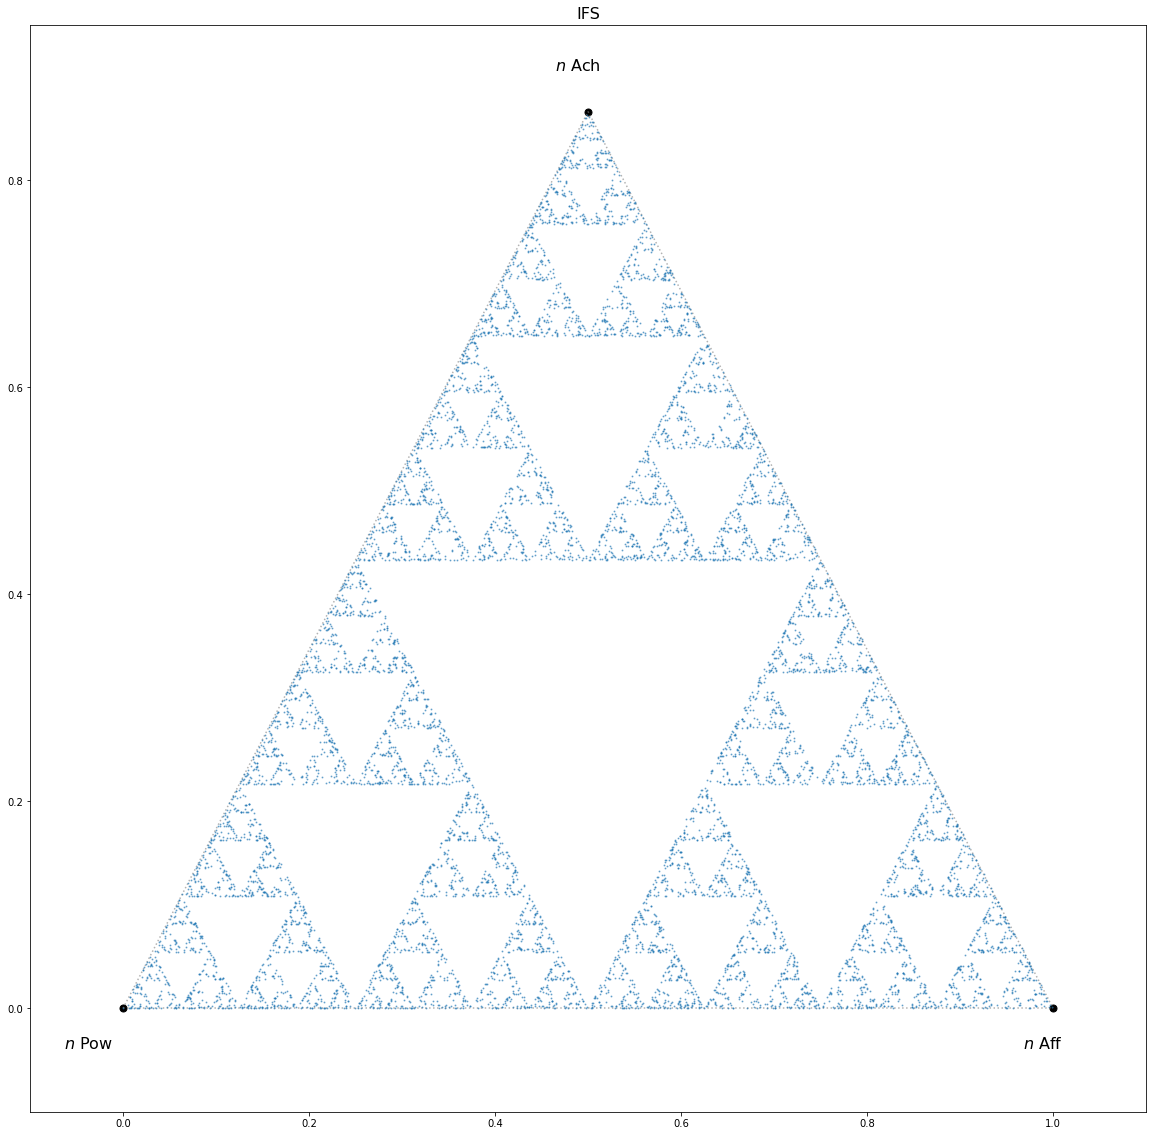

In [6]:
f,a = plt.subplots(nrows=1,ncols=1,figsize=(20,20))

#vertices
v1 = np.array([[0],[0]])
v2 = np.array([[1],[0]])
v3 = np.array([[1/2],[np.sqrt(3)/2]])

# build a rectangle in axes coords
left = 0.03
bottom = 0.07
right = 0.89
center = 0.47
up = 0.84+0.13

line1X = [v1[0],v2[0]]
line1Y = [v1[1],v2[1]]
line2X = [v3[0],v2[0]]
line2Y = [v3[1],v2[1]]
line3X = [v1[0],v3[0]]
line3Y = [v1[1],v3[1]]

fontsizeL = 16
a.set_xlim(-0.1,1.1)
a.set_ylim(-0.1,0.95)
a.plot(v1[0],v1[1],marker='o',color='black',markersize=7)
a.plot(v2[0],v2[1],marker='o',color='black',markersize=7)
a.plot(v3[0],v3[1],marker='o',color='black',markersize=7)
a.plot(line1X,line1Y,':',color='gray',alpha=0.6)
a.plot(line2X,line2Y,':',color='gray',alpha=0.6)
a.plot(line3X,line3Y,':',color='gray',alpha=0.6)
a.text(left, bottom, r'$n$ Pow',
        horizontalalignment='left',
        verticalalignment='top',
        transform=a.transAxes,
        fontsize=fontsizeL)
a.text(right, bottom, r'$n$ Aff',
        horizontalalignment='left',
        verticalalignment='top',
        transform=a.transAxes,
        fontsize=fontsizeL)
a.text(center, up, r'$n$ Ach',
        horizontalalignment='left',
        verticalalignment='top',
        transform=a.transAxes,
        fontsize=fontsizeL)

a.plot(X1,Y1,'.',label='1',alpha=0.5,markersize=2)
a.set_title("IFS",fontsize=16)

plt.plot()
print('Entropic Parameters:')
print('H: {:.3f}, DI: {:.3f}'.format(H1,DI1))
print('Biased v1: {:.3f}, v2: {:.3f}, v3: {:.3f}'.format(*biasedEnt1))
